In [500]:
import sys  

reload(sys)  
sys.setdefaultencoding('latin-1')

In [501]:
import pandas as pd
from textblob import TextBlob
import nltk
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [502]:
from library.analyze import df_to_li, stem_li, remove_stopwords, join_words, get_tf, calc_idf, get_tf_idf 

In [503]:
# load data as dataframe

df = pd.read_pickle('data/re_merge/clean.pickle')
df['hl_lead'] = df['hl'] + ' '+ df['lead']
#df = df[df['date_pub'] <= '2016-02-31'] 
df.reset_index(inplace=True)
df['year'] = df['date_pub'].dt.year
df['half_dec'] = ((df['year'] % 1900)/5).astype(int)*5 # create column of half-decades


df.head(100)

,index,nyt_id,org,hl,lead,date_pub,hl_lead,year,half_dec
0,3,4fc0a09745c1498b0d3ba216,none,marijuana smoking is reported safe hemp leaves...,a panaman judge recently sentenced an american...,1926-11-21,marijuana smoking is reported safe hemp leaves...,1926,25
1,9,4fc1d8e345c1498b0d4ccb9f,none,use of marijuana spreading in west poisonous w...,although as appalling in its effects on the hu...,1934-09-16,use of marijuana spreading in west poisonous w...,1934,30
2,12,4fc1ebab45c1498b0d528e5b,the associated press,rhode island to end weed as drug source state ...,providence ri jan 19 rhode island authorities ...,1935-01-20,rhode island to end weed as drug source state ...,1935,35
3,18,4fc1e47f45c1498b0d505955,none,police study marijuana to kill growing crops,to enable policemen to familiarize themselves ...,1936-07-24,police study marijuana to kill growing crops t...,1936,35
4,19,4fc1fc6445c1498b0d578c35,none,3000000 bonfire destroys marijuana police burn...,at bootleg prices of marijuana weed which is ...,1936-08-14,3000000 bonfire destroys marijuana police burn...,1936,35
5,20,4fc1e92c45c1498b0d51c3fa,none,5 acres of marijuana uprooted by police barren...,the police began uprooting yesterday a fiveacr...,1936-08-19,5 acres of marijuana uprooted by police barren...,1936,35
6,30,4fc2051f45c1498b0d5a1f00,none,world group to push fight on marijuana illicit...,with special emphasis on the increasing use of...,1937-02-21,world group to push fight on marijuana illicit...,1937,35
7,44,4fc2019145c1498b0d592436,none,drive on narcotics sped by treasury campaign t...,the virtual elimination of rumrunning from the...,1938-01-31,drive on narcotics sped by treasury campaign t...,1938,35
8,45,4fc1fef745c1498b0d58582e,none,mrs sohl admits holdup shooting but says narco...,attributing her brief criminal career to addic...,1938-02-11,mrs sohl admits holdup shooting but says narco...,1938,35
9,47,4fc1fec245c1498b0d5848c5,none,insanity stressed in mrs sohls case her defens...,further testimony intended to show that mrs et...,1938-02-13,insanity stressed in mrs sohls case her defens...,1938,35


In [504]:
df_half_dec = df.groupby('half_dec')['hl_lead'].apply(lambda x: '%s' % ' '.join(x)).to_frame(name='hl_lead')
df_half_dec = df_half_dec.loc[df_half_dec.index >= 35]
df_half_dec.head(3)

,hl_lead
half_dec,
35,rhode island to end weed as drug source state ...
40,the play the play called sweet charity that ha...
45,experts discount marijuana as big factor in cr...


In [505]:
li = df_to_li(df_half_dec, 'hl_lead'); li[0]

'rhode island to end weed as drug source state plans drive to eradicate marijuana plant after wide traffic in hashish providence ri jan 19 rhode island authorities are planning a spring drive to eradicate the marijuana or mexico weed which long has been the source of large supplies of the dangerous narcotic drug known as hashish police study marijuana to kill growing crops to enable policemen to familiarize themselves with the appearance of marijuana pots of the narcotic weed have been placed on exhibition during the past few days in the assembly rooms of station houses in various sections of brooklyn 3000000 bonfire destroys marijuana police burn narcotic weed and fifty bagatelle machines in brooklyn vacant lot at bootleg prices  of marijuana weed which is used in cigarette form as a narcotic was burned in a vacant lot in brooklyn yesterday in the presence of police commissioner valentine captain joseph mooney of the narcotic squad and other police officials 5 acres of marijuana uproo

In [506]:
li_stemmed = stem_li(li); li_stemmed[0]

[u'rhode',
 u'island',
 u'to',
 u'end',
 u'weed',
 u'as',
 u'drug',
 u'sourc',
 u'state',
 u'plan',
 u'drive',
 u'to',
 u'erad',
 u'marijuana',
 u'plant',
 u'after',
 u'wide',
 u'traffic',
 u'in',
 u'hashish',
 u'provid',
 u'ri',
 u'jan',
 u'19',
 u'rhode',
 u'island',
 u'author',
 u'are',
 u'plan',
 u'a',
 u'spring',
 u'drive',
 u'to',
 u'erad',
 u'the',
 u'marijuana',
 u'or',
 u'mexico',
 u'weed',
 u'which',
 u'long',
 u'ha',
 u'been',
 u'the',
 u'sourc',
 u'of',
 u'larg',
 u'suppli',
 u'of',
 u'the',
 u'danger',
 u'narcot',
 u'drug',
 u'known',
 u'as',
 u'hashish',
 u'polic',
 u'studi',
 u'marijuana',
 u'to',
 u'kill',
 u'grow',
 u'crop',
 u'to',
 u'enabl',
 u'policemen',
 u'to',
 u'familiar',
 u'themselv',
 u'with',
 u'the',
 u'appear',
 u'of',
 u'marijuana',
 u'pot',
 u'of',
 u'the',
 u'narcot',
 u'weed',
 u'have',
 u'been',
 u'place',
 u'on',
 u'exhibit',
 u'dure',
 u'the',
 u'past',
 u'few',
 u'day',
 u'in',
 u'the',
 u'assembl',
 u'room',
 u'of',
 u'station',
 u'hous',
 u'in',


In [507]:
li_sw = remove_stopwords(li_stemmed); li_sw[0]

[u'rhode',
 u'island',
 u'end',
 u'weed',
 u'drug',
 u'sourc',
 u'state',
 u'plan',
 u'drive',
 u'erad',
 u'marijuana',
 u'plant',
 u'wide',
 u'traffic',
 u'hashish',
 u'provid',
 u'ri',
 u'jan',
 u'19',
 u'rhode',
 u'island',
 u'author',
 u'plan',
 u'spring',
 u'drive',
 u'erad',
 u'marijuana',
 u'mexico',
 u'weed',
 u'long',
 u'ha',
 u'sourc',
 u'larg',
 u'suppli',
 u'danger',
 u'narcot',
 u'drug',
 u'known',
 u'hashish',
 u'polic',
 u'studi',
 u'marijuana',
 u'kill',
 u'grow',
 u'crop',
 u'enabl',
 u'policemen',
 u'familiar',
 u'themselv',
 u'appear',
 u'marijuana',
 u'pot',
 u'narcot',
 u'weed',
 u'place',
 u'exhibit',
 u'dure',
 u'past',
 u'day',
 u'assembl',
 u'room',
 u'station',
 u'hous',
 u'variou',
 u'section',
 u'brooklyn',
 u'3000000',
 u'bonfir',
 u'destroy',
 u'marijuana',
 u'polic',
 u'burn',
 u'narcot',
 u'weed',
 u'fifti',
 u'bagatel',
 u'machin',
 u'brooklyn',
 u'vacant',
 u'lot',
 u'bootleg',
 u'price',
 u'marijuana',
 u'weed',
 u'use',
 u'cigarett',
 u'form',
 u'nar

In [508]:
documents = join_words(li_sw); documents[0]

'rhode island end weed drug sourc state plan drive erad marijuana plant wide traffic hashish provid ri jan 19 rhode island author plan spring drive erad marijuana mexico weed long ha sourc larg suppli danger narcot drug known hashish polic studi marijuana kill grow crop enabl policemen familiar themselv appear marijuana pot narcot weed place exhibit dure past day assembl room station hous variou section brooklyn 3000000 bonfir destroy marijuana polic burn narcot weed fifti bagatel machin brooklyn vacant lot bootleg price marijuana weed use cigarett form narcot wa burn vacant lot brooklyn yesterday presenc polic commission valentin captain joseph mooney narcot squad polic offici 5 acr marijuana uproot polic barren island goat thrive polic began uproot yesterday fiveacr field marijuana discov barren island south floyd bennett airport milk goat belong squatter vicin graze world group push fight marijuana illicit drug chief target week narcot fight open today special emphasi increas use ma

In [553]:
len(documents)

17

In [509]:
df_tf = get_tf(documents, 4)

In [510]:
idf = calc_idf(df_tf)
tf_idf = get_tf_idf(df_tf, idf); tf_idf.head(3)

,007,007 ratti,007 ratti puni,007 ratti puni account,01,01 nanogram,01 nanogram per,01 nanogram per cubic,011441712405224,011441712405224 concern,...,zwirner 43,zwirner 43 green,zwirner 43 green street,zwirner wirth,zwirner wirth 32,zwirner wirth 32 east,zydeco,zydeco danc,zydeco danc lesson,zydeco danc lesson 630
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [511]:
X = tf_idf.as_matrix()
X.shape

(17, 1104356)

In [512]:
from sklearn.metrics.pairwise import cosine_similarity

In [513]:
from sklearn.decomposition import PCA

In [514]:
pca = PCA(n_components=12)
X_transformed = pca.fit_transform(X); X_transformed.shape

(17, 12)

In [515]:
explained_variance = pca.explained_variance_ratio_; explained_variance

array([  7.92078265e-01,   5.02716858e-02,   4.02752378e-02,
         2.90764680e-02,   2.05170159e-02,   1.99508901e-02,
         1.72568894e-02,   1.22523033e-02,   8.33002977e-03,
         5.13229085e-03,   3.34441998e-03,   5.52138993e-04])

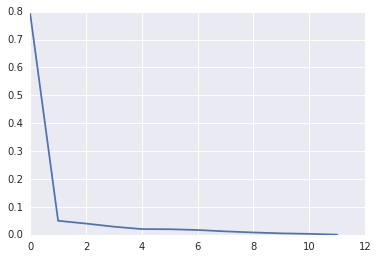

In [516]:
plt.plot(explained_variance)

In [548]:
X_top_three = (X_transformed.T[:4]).T; X_top_three.shape

(17, 4)

In [549]:
from sklearn.metrics.pairwise import cosine_similarity

In [550]:
co_sim_matrix = cosine_similarity(X_top_three, X_top_three); co_sim_matrix

array([[  1.00000000e+00,   9.99996400e-01,   9.99999886e-01,
          9.99999983e-01,   9.99998077e-01,   9.99997268e-01,
          9.99933854e-01,   9.99424541e-01,   9.99877437e-01,
          9.63656967e-01,   9.93915925e-01,   9.25097852e-01,
         -7.53146587e-02,  -6.85882628e-02,  -9.07102471e-01,
          1.26108552e-01,   6.48491020e-01],
       [  9.99996400e-01,   1.00000000e+00,   9.99996881e-01,
          9.99996363e-01,   9.99999734e-01,   9.99999935e-01,
          9.99904930e-01,   9.99340930e-01,   9.99837012e-01,
          9.63102623e-01,   9.93717011e-01,   9.24538941e-01,
         -7.49684154e-02,  -6.80137362e-02,  -9.07882477e-01,
          1.28682285e-01,   6.50440506e-01],
       [  9.99999886e-01,   9.99996881e-01,   1.00000000e+00,
          9.99999871e-01,   9.99998363e-01,   9.99997699e-01,
          9.99929236e-01,   9.99412469e-01,   9.99871691e-01,
          9.63548403e-01,   9.93867988e-01,   9.24921306e-01,
         -7.57028148e-02,  -6.85545480e-02

In [551]:
import seaborn as sns

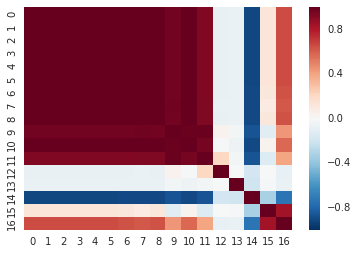

In [552]:
ax = sns.heatmap(co_sim_matrix, cmap="RdBu_r", annot=False)

In [ ]:
# clusters
cutoffs = [90, 95, 100, 105, 115]

In [ ]:
df_bins = df.copy()
df_bins['bin'] 